### Import all Libraries

In [21]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving SampleLogitReg.csv to SampleLogitReg.csv


### Create a DataFrame

In [4]:
logisticData = pd.read_csv(filename)

In [5]:
logisticData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          29 non-null     int64 
 1   Gender           29 non-null     object
 2   Age              29 non-null     int64 
 3   EstimatedSalary  29 non-null     int64 
 4   Purchased        29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [19]:
logisticData.head(50)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


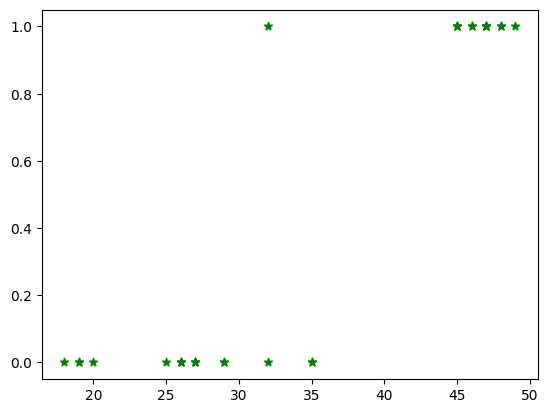

In [9]:
plt.scatter(logisticData.Age, logisticData.Purchased, marker='*', color='green')

In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(logisticData[['Age']], logisticData.Purchased)

LogisticRegression()

In [14]:
model.predict([[27]])

array([0])

In [16]:
model.predict([[57]])

array([1])

### Optimization

Overfitting and Uderfitting


**"overfitting" occurs when a model learns the training data too closely, performing well on the training set but poorly on new data due to memorizing noise instead of generalizing patterns, while "underfitting" happens when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test sets"**

**"best fit" refers to the ideal scenario where a model balances between overfitting and underfitting, accurately capturing the data's patterns while still generalizing well to unseen data."**

In [22]:
uploaded2 = files.upload()
filename2 = next(iter(uploaded2))

Saving SampleDataset.csv to SampleDataset.csv


In [24]:
sampleData = pd.read_csv(filename2)

In [25]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [26]:
sampleData.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [32]:
salaryMean = sampleData.Salary.mean()
salaryMean

63777.77777777778

In [34]:
sampleData.Salary = sampleData.Salary.fillna(value=salaryMean)
sampleData.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,NaN,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [39]:
ageMean = sampleData.Age.mean()
ageMean

38.77777777777778

In [40]:
sampleData.Age = sampleData.Age.fillna(value=ageMean)
sampleData.head(10)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [41]:
X = sampleData[['Age']]
Y = sampleData.Purchased

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x_test)

In [46]:
y_pred

array(['No', 'Yes'], dtype=object)

In [47]:
print("Actual Price: ", y_test)
print("Actual Price: ", y_pred)

Actual Price:  1    Yes
0     No
Name: Purchased, dtype: object
Actual Price:  ['No' 'Yes']
